In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

import joblib

In [4]:
#1.Load data

df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
df=df[features+['Survived']].dropna()

In [6]:
print("Data Sample:\n",df.head())

Data Sample:
    Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0


In [7]:
num_features=['Pclass','Age','SibSp','Fare']
cat_features=['Sex','Embarked']

In [8]:
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder()

In [9]:
preprocessor=ColumnTransformer(
[('num',num_transformer,num_features),
('cat',cat_transformer,cat_features)])

In [10]:
X=df[features]
y=df['Survived']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
print(f"training set shape:{X_train.shape}")

training set shape:(569, 7)


In [13]:
print(f"Testing set shape:{X_test.shape}")

Testing set shape:(143, 7)


In [14]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier())
])

In [15]:
pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
y_pred=pipeline.predict(X_test)

In [17]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:0.67


In [18]:
joblib.dump(pipeline,'mlpipeline.pkl')

['mlpipeline.pkl']

In [19]:
loaded_pipeline=joblib.load('mlpipeline.pkl')

In [20]:
sample_data=pd.DataFrame([{'Pclass':3,'Sex':'female','Age':25,'SibSp':0,'Parch':0,'Fare':7.5,'Embarked':'S'}])

In [21]:
prediction=loaded_pipeline.predict(sample_data)

In [2]:
print(f"Prediction for Sample Data:{'Survived'if prediction[0]==1 else 'Did not Survived'}")

NameError: name 'prediction' is not defined

NameError: name 'pipeline' is not defined

IndexError: index 8 is out of bounds for axis 0 with size 7

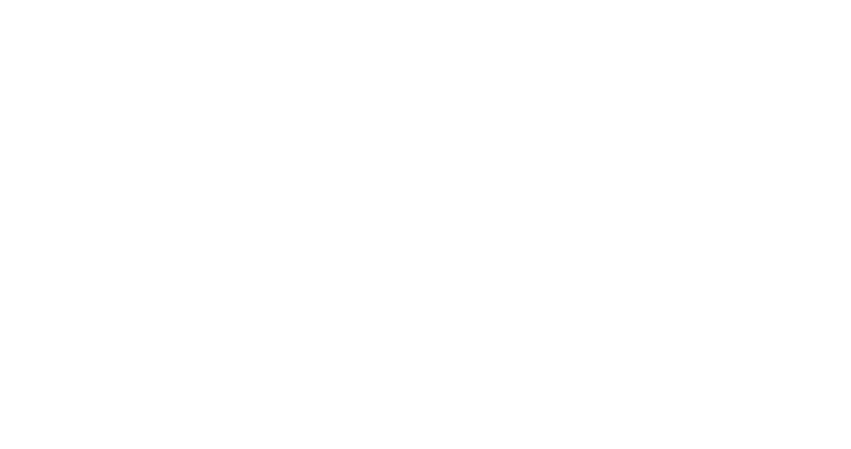